In [1]:
import pandas as pd
from sklearn.datasets import load_iris
data=load_iris()
df=pd.DataFrame(load_iris().data,columns=load_iris().feature_names)
x=df
y=load_iris().target

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

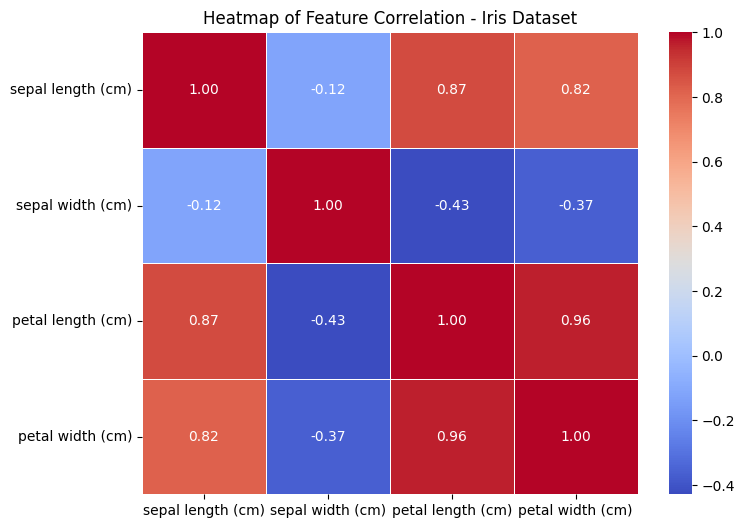

In [3]:
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Heatmap of Feature Correlation - Iris Dataset")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [5]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [6]:
y_pred = knn.predict(X_test)

In [7]:
print("Correct Predictions:")
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        print(
            f"Actual: {data.target_names[y_test[i]]}, "
            f"Predicted: {data.target_names[y_pred[i]]}"
        )

print("\nWrong Predictions:")
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        print(
            f"Actual: {data.target_names[y_test[i]]}, "
            f"Predicted: {data.target_names[y_pred[i]]}"
        )

Correct Predictions:
Actual: versicolor, Predicted: versicolor
Actual: setosa, Predicted: setosa
Actual: virginica, Predicted: virginica
Actual: versicolor, Predicted: versicolor
Actual: versicolor, Predicted: versicolor
Actual: setosa, Predicted: setosa
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: versicolor, Predicted: versicolor
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: setosa, Predicted: setosa
Actual: setosa, Predicted: setosa
Actual: setosa, Predicted: setosa
Actual: setosa, Predicted: setosa
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: versicolor, Predicted: versicolor
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: setosa, Predicted: setosa
Actual: virginica, Predicted: virginica
Actual: setosa, Predicted: setosa
Actual: virginica, Predicted: virginica
Actual: virginica, Predicted: virginica
Actual: v

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



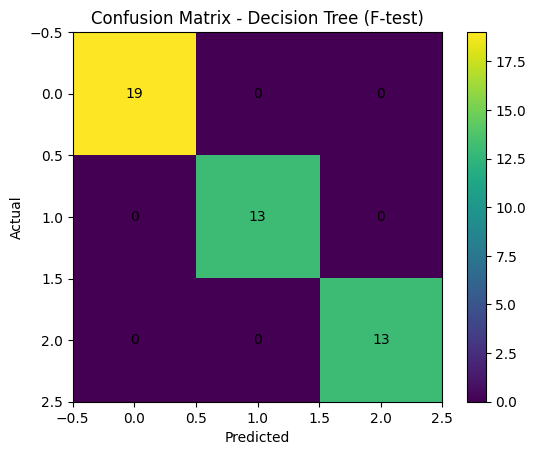

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
plt.title("Confusion Matrix - Decision Tree (F-test)")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.show()


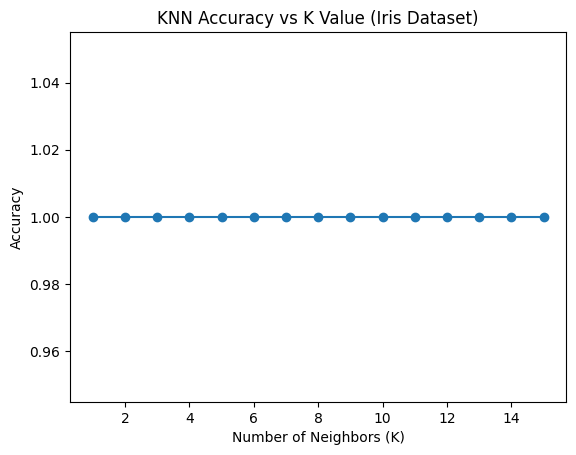

In [10]:
k_values = range(1, 16)
accuracies = []

# Train KNN for different K values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot graph
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K Value (Iris Dataset)")
plt.show()